# K-Means Clustering for Determining Public vs. Private Universities
I will be using K-Means clustering on university data to determine if a university is Public or Private. This project could be done with other classification algorithms, but, for the sake of practice and performance comparison, I will be using K-Means clustering to see if we can get adequate results by clustering our data. 

This project was completed as part of the Udemy online course Python for Data Science and Machine Learning Bootcamp.

# Importing Libraries and Data

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [3]:
#importing the data
univ = pd.read_csv('College_Data')

In [4]:
univ.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [5]:
univ.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


In [6]:
univ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 19 columns):
Unnamed: 0     777 non-null object
Private        777 non-null object
Apps           777 non-null int64
Accept         777 non-null int64
Enroll         777 non-null int64
Top10perc      777 non-null int64
Top25perc      777 non-null int64
F.Undergrad    777 non-null int64
P.Undergrad    777 non-null int64
Outstate       777 non-null int64
Room.Board     777 non-null int64
Books          777 non-null int64
Personal       777 non-null int64
PhD            777 non-null int64
Terminal       777 non-null int64
S.F.Ratio      777 non-null float64
perc.alumni    777 non-null int64
Expend         777 non-null int64
Grad.Rate      777 non-null int64
dtypes: float64(1), int64(16), object(2)
memory usage: 115.4+ KB


We are given the following information on the column names:
* Private: A factor with levels No and Yes indicating private or public university
* Apps: Number of applications received
* Accept: Number of applications accepted
* Enroll: Number of new students enrolled
* Top10perc: Pct. new students from top 10% of H.S. class
* Top25perc: Pct. new students from top 25% of H.S. class
* F.Undergrad: Number of fulltime undergraduates
* P.Undergrad: Number of parttime undergraduates
* Outstate: Out-of-state tuition
* Room.Board: Room and board costs
* Books: Estimated book costs
* Personal: Estimated personal spending
* PhD: Pct. of faculty with Ph.D.’s
* Terminal: Pct. of faculty with terminal degree
* S.F.Ratio: Student/faculty ratio
* perc.alumni: Pct. alumni who donate
* Expend: Instructional expenditure per student
* Grad.Rate: Graduation rate

In [11]:
import pandas_profiling
l = list(univ.columns)
pandas_profiling.ProfileReport(univ, correlation_overrides=l)

Number of variables,19
Number of observations,777
Total Missing (%),0.0%
Total size in memory,115.4 KiB
Average record size in memory,152.1 B
Numeric,17
Categorical,1
Boolean,0
Date,0
Text (Unique),1
Rejected,0


From the stats displayed in the describe method and the pandas profiling, we can see that the PhD and graduation rate maximums are above 100, which doesn't make any sense. We will need to investigate.

In [15]:
univ[univ['Grad.Rate']>100]

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
95,Cazenovia College,Yes,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118


118 is clearly an error, but we don't know the correct stat for the university. In order to preserve most of the data in the row, we'll assume that they are at or close to 100

In [24]:
univ.loc[univ['Unnamed: 0']=='Cazenovia College','Grad.Rate']=100

In [25]:
univ[univ['Unnamed: 0']=='Cazenovia College']

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
95,Cazenovia College,Yes,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,100


In [26]:
univ[univ['PhD']>100]

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
582,Texas A&M University at Galveston,No,529,481,243,22,47,1206,134,4860,3122,600,650,103,88,17.4,16,6415,43


In [27]:
#same with the above, we'll set the PhD to 100
univ.loc[univ['Unnamed: 0']=='Texas A&M University at Galveston','PhD']=100

In [28]:
univ[univ['Unnamed: 0']=='Texas A&M University at Galveston']

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
582,Texas A&M University at Galveston,No,529,481,243,22,47,1206,134,4860,3122,600,650,100,88,17.4,16,6415,43


# Exploratory Data Analysis

Now, with these values accounted for, we'll do some exploratory data analysis with our target value in mind. Note that, in a normal clustering situation, we wouldn't have the target value and would therefore not be able to use it as part of the exploratory analysis. 

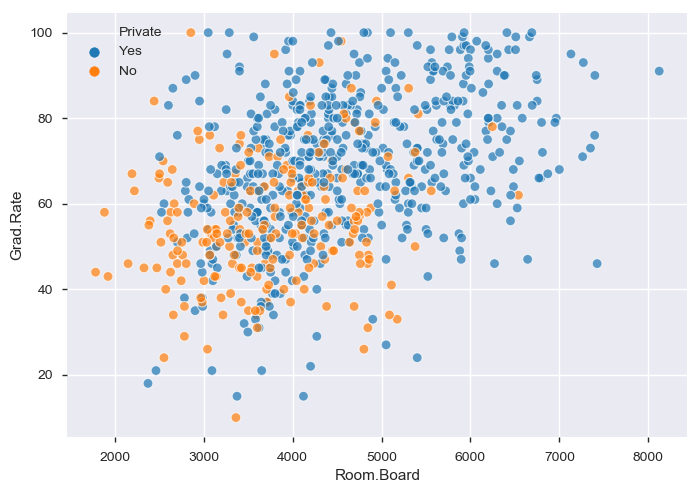

In [32]:
sns.scatterplot(data = univ,x='Room.Board',y='Grad.Rate', hue = 'Private',alpha = 0.7)

Text(0.5,1,'Count of Graduation Rate')

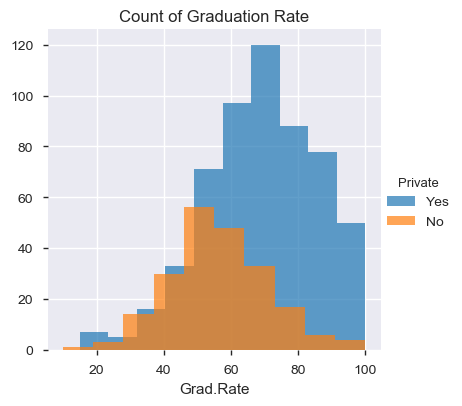

In [52]:
g = sns.FacetGrid(univ,hue='Private',height=4)
g = (g.map(plt.hist,'Grad.Rate', alpha=0.7)).add_legend()
axes = g.axes.flatten()
axes[0].set_title('Count of Graduation Rate')

In general, it looks like private universities have a higher graduation rate on average, with private universities with a higher room and board cost having higher graduation rates as well. This could be due to a number of factors, including that better universities may be in locations with higher board costs in general (think boston, New York, San Francisco).

Let's explore a little more.

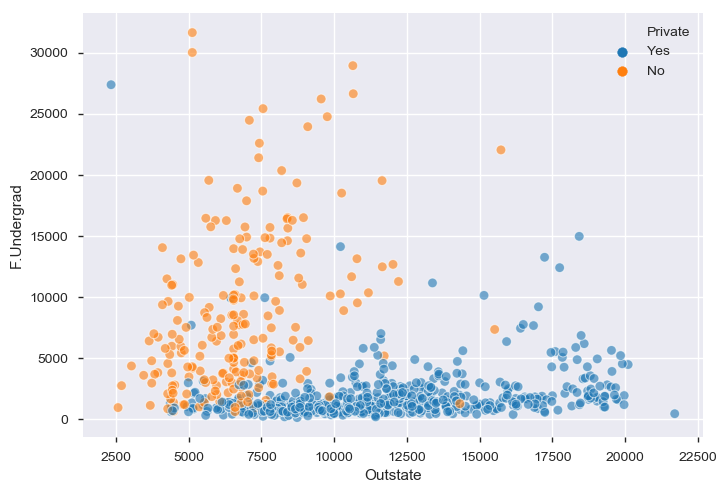

In [56]:
sns.scatterplot(univ['Outstate'],univ['F.Undergrad'], hue = univ['Private'], alpha=0.6)

Text(0.5,1,'Count of Outstate Tuition')

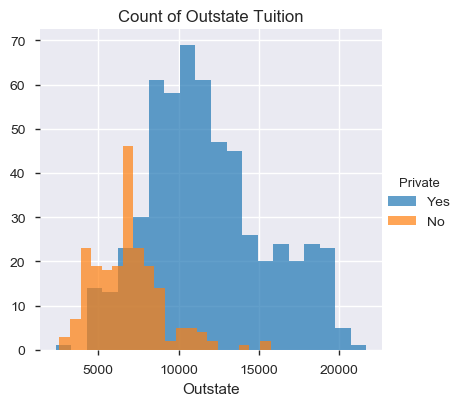

In [58]:
g = sns.FacetGrid(univ,hue='Private',height=4)
g = (g.map(plt.hist,'Outstate', alpha=0.7, bins=20)).add_legend()
axes = g.axes.flatten()
axes[0].set_title('Count of Outstate Tuition')

As I expected, from what I've seen personally, private universities have higher out of state tuition. What's interesting is that the number of full time students is about the same for private universities, regardless of the out of state tuition. This could imply that the schools with higher out of state tuition could have better quality due to the amount of money the school is receiving, but we would have to do more research into university ratings, etc. to see if this is true.

# K-Means Clustering

In [59]:
from sklearn.cluster import KMeans

In [65]:
#set the name column to the index
univ = univ.set_index('Unnamed: 0')

In [66]:
univ.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Unnamed: 0,,,,,,,,,,,,,,,,,,
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [60]:
kmeans = KMeans(n_clusters=2)

In [67]:
kmeans.fit(univ.drop('Private',axis=1))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

We now have access to the cluster centers and the labels the algorithm has given our data.

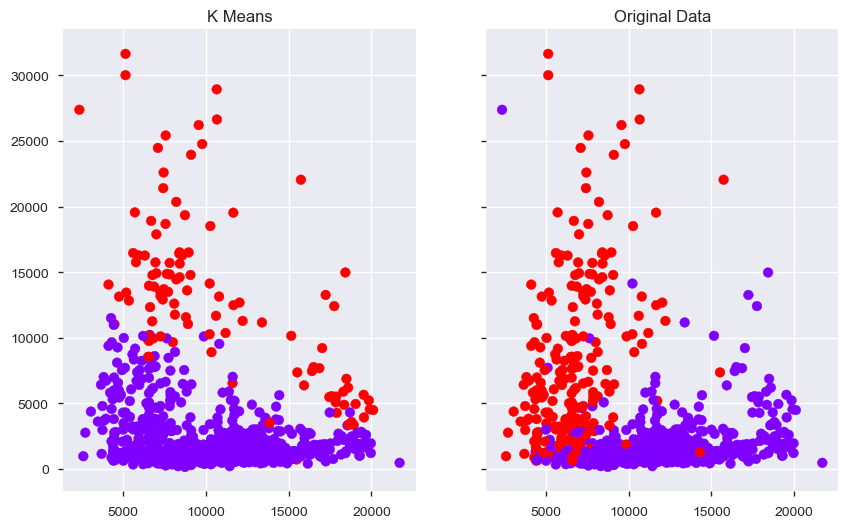

In [80]:
#to give a quick visual example of what the clustering algorithm did

#matching the encoding with the k-means labeling output
b = np.where(univ['Private'].str.contains('Yes'),0,1)

#visualization
fig, (ax1,ax2) = plt.subplots(1,2,sharey=True,figsize=(10,6))

ax1.set_title('K Means')
ax1.scatter(univ['Outstate'],univ['F.Undergrad'],c=kmeans.labels_,cmap='rainbow')

ax2.set_title('Original Data')
ax2.scatter(univ['Outstate'],univ['F.Undergrad'],c=b,cmap='rainbow')

This is only one of the many plots you can make, but we can see that the clustering didn't do too bad in this example. Because we have many dimensions, simply basing how well our clustering did on this visualization would be a mistake. This visualization is simply used to help us understand what the clustering is doing. Note that in normal unsupervised situations, we would not be able to compare our clustering results to the "original data" as shown here.

# Evalutation

Because the original data includes the target variable, we can compare our results using classification reports and confusion matrices. In a normal unsupervised situation, we would perform the elbow method on the number of clusters and choose the cluster number with the lowest sum of squared errors (SSE) (or other criterion value) or choose the cluster number that makes the most sense for that situation. 

In this case, mostly because this is practice, we will be evaluating this algorithm with a classification report and confusion matrix.

In [82]:
from sklearn.metrics import classification_report, confusion_matrix

In [83]:
print(confusion_matrix(b,kmeans.labels_))
print(classification_report(b,kmeans.labels_))

[[531  34]
 [138  74]]
              precision    recall  f1-score   support

           0       0.79      0.94      0.86       565
           1       0.69      0.35      0.46       212

   micro avg       0.78      0.78      0.78       777
   macro avg       0.74      0.64      0.66       777
weighted avg       0.76      0.78      0.75       777



We see that our K-Means clustering didn't do so bad! We have to always keep in mind that, as a clustering algorithm, K-Means isn't meant for prediction, but simply clustering the data as given to help us understand how the data may be grouped. Even though we already knew it was grouped in a specific way, it appears that the K-Means clustering algorithm also picked up on these differences as it clustered the data into two groups. 

In the future, I would like to apply K-Means to a market segmentation analysis and see how it does in creating segments.

# Conclusion
I used K-Means clustering to see how well clustering could split the data into two groups of already-known target variables. In splitting the data into two groups, the K-Means algorithm did fairly well. Though it is not best used as a supervised predictive algorithm as shown here, it's clear that K-Means clustering could help bring real insight into a data set without a target variable. I look forward to applying this in future data analytics work.